### Выборка, генеральная совокупность, статистические меры

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

np.random.seed(1234)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Пример формирования генеральной совокупности с нормальным распределением.

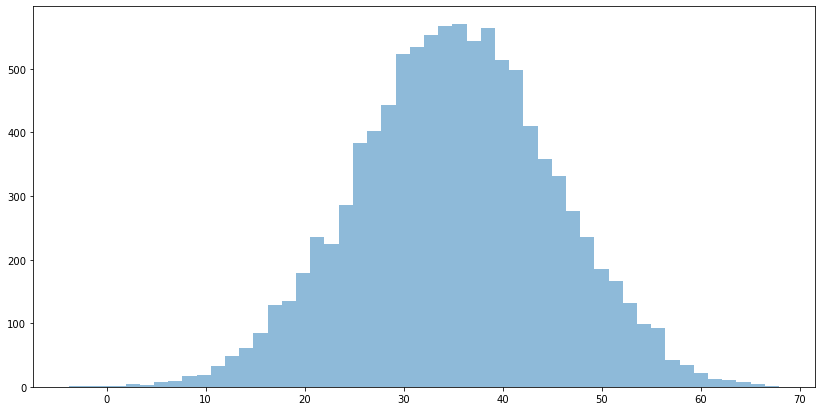

In [2]:
# scale - станд. отклонение, loc - среднее

norm_rv1 = stats.norm(loc=35, scale=10)

# генерируем случайные значения из распределения norm_rv1

gen_pop = norm_rv1.rvs(size=10000)

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.5)
plt.show()

Также рассмотрим пример с лонгнормальным распределением

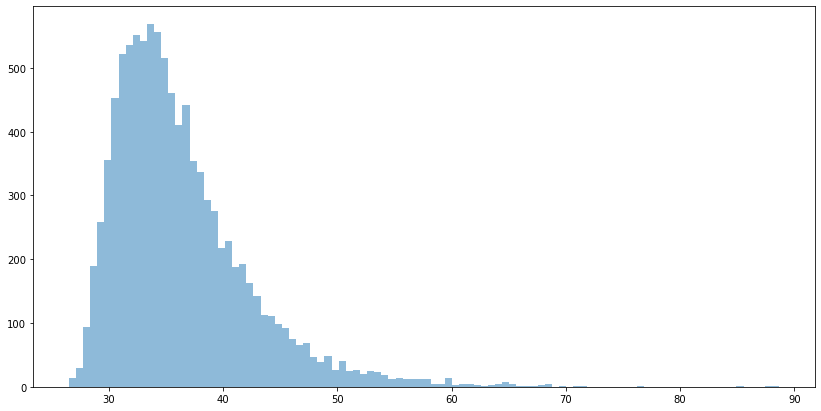

In [3]:
ln_distrib = stats.lognorm(0.5, loc=25, scale = 10)
gen_pop_ln = ln_distrib.rvs(size=10000)

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(111)
plt.hist(gen_pop_ln, 100, alpha=0.5)
plt.show()

Это будут два наших теоретических распределения генеральных совокупностей 

### Описательная статистика

#### Меры концентрации

Медиана - это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него

In [4]:
median = np.median(gen_pop)
median_ln = np.median(gen_pop_ln)

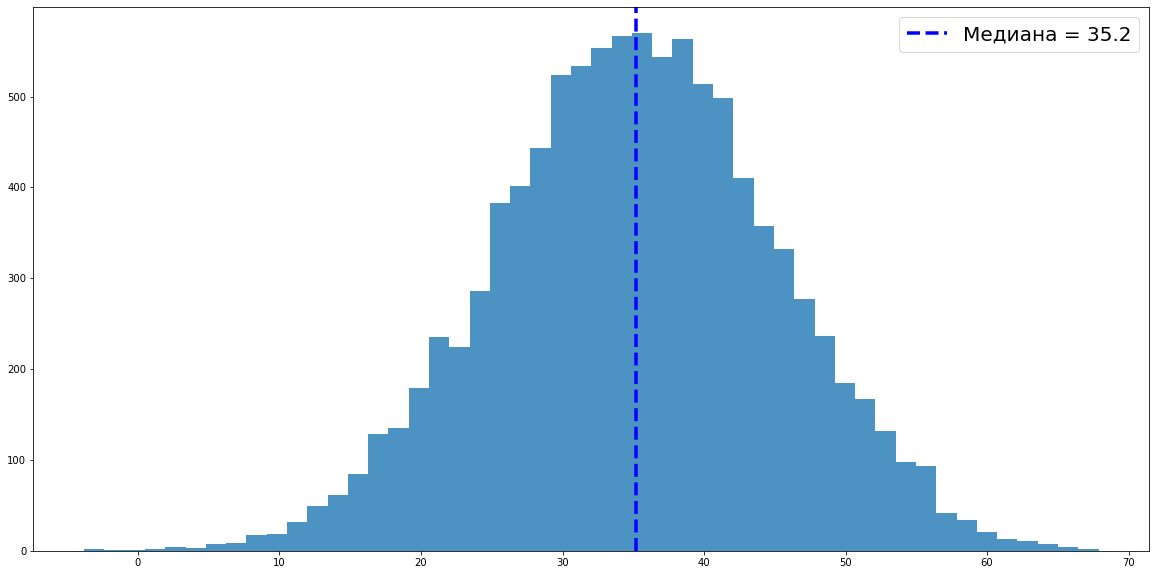

In [5]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.8)
linel = plt.axvline(median, label=('Медиана = ' + str(round(median, 1))),
                   color='blue', linestyle='dashed', linewidth=3.5)

ax1.legend(handles=[linel], fontsize = 20)
plt.show()

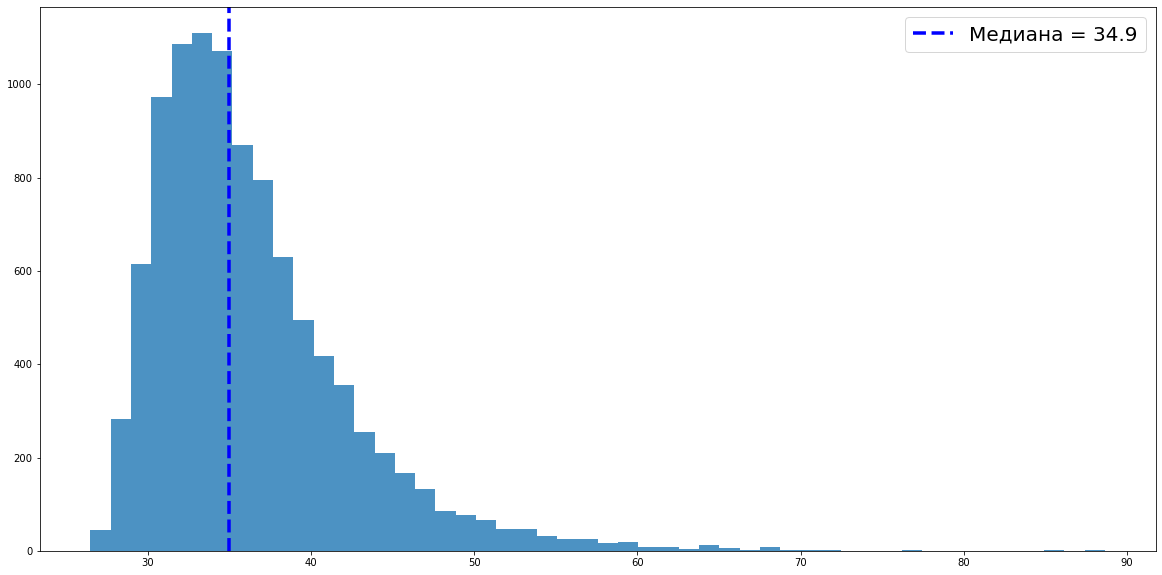

In [6]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(111)
plt.hist(gen_pop_ln, 50, alpha=0.8)
linel = plt.axvline(median_ln, label=('Медиана = ' + str(round(median_ln, 1))),
                   color='blue', linestyle='dashed', linewidth=3.5)

ax1.legend(handles=[linel], fontsize = 20)
plt.show()

Мода - значение во множестве наблюдений, которое встречается наиболее часто.

In [11]:
dscrt_lst = np.random.randint(0, 100, size=1000)

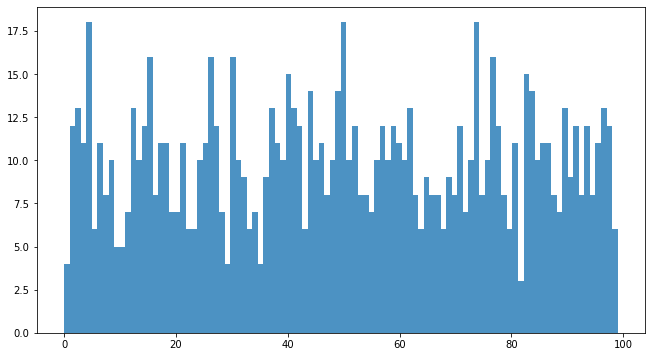

In [12]:
fig = plt.figure(figsize=(24,6))

ax1 = plt.subplot(121)
plt.hist(dscrt_lst, 100, alpha=0.8)
plt.show()

In [14]:
mode = stats.mode(dscrt_lst)
mode

ModeResult(mode=array([4]), count=array([18]))

Квантиль - это значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем

In [15]:
np.percentile(gen_pop, 75)
stats.scoreatpercentile(gen_pop, 75)

41.836611373999276

In [16]:
df_box_plot = pd.DataFrame()
df_box_plot['gen_pop'] = gen_pop
df_box_plot['gen_pop_ln'] = gen_pop_ln

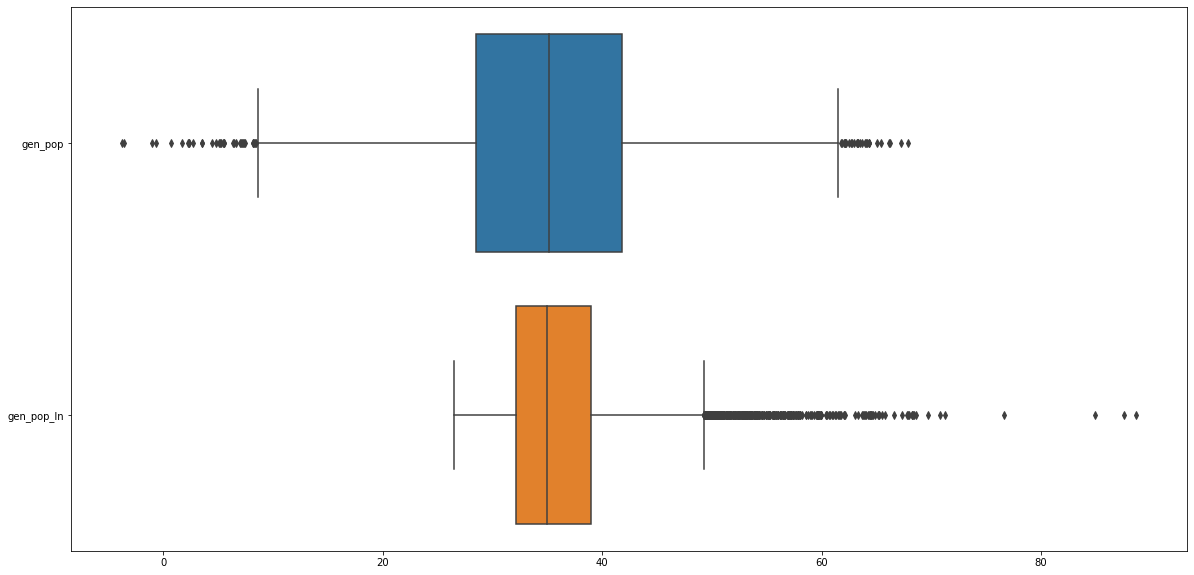

In [17]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=df_box_plot, orient='h')
plt.show()

Среднее арифметическое

In [7]:
mean = np.mean(gen_pop)
mean

35.16126460047198

In [10]:
n = 20
sample = np.random.choice(gen_pop, n, replace=False)
sample

array([42.97837614, 26.4825517 , 53.65347843, 38.05682784, 31.78482698,
       38.97085751, 26.80510045, 32.88547571, 47.21021463, 37.59385607,
       43.00596956, 39.93222593, 49.24170174, 42.40140759, 45.91346953,
       33.09232063, 48.65693698, 36.8813799 , 34.77539126, 31.02063049])

In [11]:
sample_mean = np.mean(sample)
sample_mean

39.06714995316795

### Меры разброса

In [12]:
# Дисперсия

var_ = np.var(gen_pop)
var_

99.03830444979266

In [13]:
# Среднеквадратическое отклонение

std_ = np.std(gen_pop)
std_

9.951799055939215

In [14]:
std_sample = np.std(sample, ddof = 1)
std_sample

7.577402241441298

In [15]:
iterations = 1000
n = 20

std_sample_l = []
std_sample_l_corrected = []

for i in range(iterations):
    sample = np.random.choice(gen_pop, n, replace=False)
    std_sample = np.std(sample)
    std_sample_corrected = np.std(sample, ddof = 1)
    
    std_sample_l.append(std_sample)
    std_sample_l_corrected.append(std_sample_corrected)

In [16]:
std_sample_l

[8.859500586397253,
 10.816916400285058,
 8.098187090067979,
 8.756487256624647,
 10.654224891612957,
 9.32196115952523,
 8.750870199947355,
 11.936445818840854,
 10.241411624324133,
 10.143252961049479,
 10.061510426856692,
 6.800019109737814,
 7.277693616353752,
 7.569548499789167,
 9.373704625964228,
 7.335406028159082,
 10.162170300408889,
 12.825521462723977,
 11.265683391542098,
 9.589587158682018,
 9.570432692820154,
 9.708736656620378,
 9.784412756705981,
 10.755524415243164,
 9.020733486827837,
 10.90976541745532,
 9.701239529567358,
 8.869630865477925,
 12.384622206216227,
 8.809860620748156,
 8.415311401248688,
 8.99936889467823,
 11.27962978387953,
 7.7425646773555155,
 9.610690972817856,
 10.523986213965092,
 9.306866919339276,
 10.287443853226367,
 9.541442395998061,
 8.683671140839792,
 8.571837316174477,
 9.770502190528802,
 9.525097713595674,
 6.172251064144532,
 8.503487664994076,
 8.51026551986156,
 8.37521176432166,
 9.616148492321074,
 9.712404108131116,
 8.0502356

In [17]:
std_sample_l_corrected

[9.08965581192931,
 11.097922063007339,
 8.308564645545214,
 8.983966365606406,
 10.93100409704169,
 9.564130348651508,
 8.978203387053071,
 12.246535010968065,
 10.507466621349815,
 10.406757957760405,
 10.322891887234025,
 6.976672400356359,
 7.466756103487268,
 7.766192895842339,
 9.617218025079763,
 7.5259677886461605,
 10.426166738422205,
 13.158707374958322,
 11.558347281167451,
 9.838708830241533,
 9.819056762921505,
 9.960953635788105,
 10.038595676246162,
 11.034935215362824,
 9.25507727741499,
 11.193183144636413,
 9.953261745728874,
 9.10004925896666,
 12.70635428233093,
 9.038726281775084,
 8.633927323736538,
 9.233157668368365,
 11.572655977795344,
 7.943703748585935,
 9.86036088669133,
 10.797382033170784,
 9.548643984979545,
 10.554694691701737,
 9.789313345961515,
 8.909258607128217,
 8.79451952399072,
 10.02432373648313,
 9.772544055644959,
 6.332595975446845,
 8.724394261507056,
 8.731348193874672,
 8.592785964322934,
 9.865960183557714,
 9.964716361645443,
 8.2593675

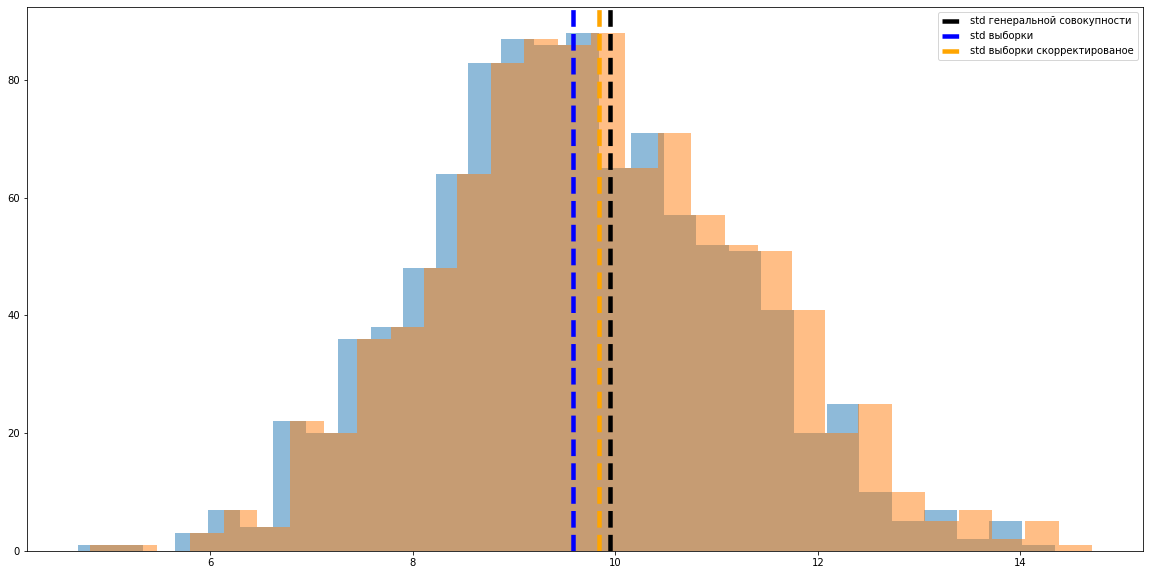

In [19]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(111)
plt.hist(std_sample_l, alpha=0.5, bins=30)
plt.hist(std_sample_l_corrected, alpha=0.5, bins=30)

line1 = plt.axvline(std_, color='black', linestyle='dashed', linewidth=4.5,
                   label = 'std генеральной совокупности')
line2 = plt.axvline(np.mean(std_sample_l), color='blue', linestyle='dashed', linewidth=4.5,
                   label = 'std выборки')
line3 = plt.axvline(np.mean(std_sample_l_corrected), color='orange', linestyle='dashed', linewidth=4.5,
                   label = 'std выборки скорректированое')

plt.legend()
plt.show()

### Стандартная ошибка среднего

In [20]:
n = 20

sample = np.random.choice(gen_pop, n, replace=False)
# оценка стандартной ошбки по выборке
stats.sem(sample)

2.316746818589464

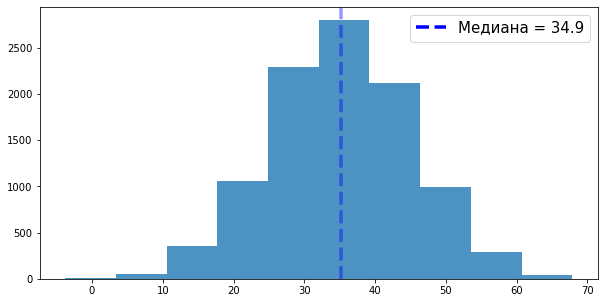

In [22]:
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(111)
plt.hist(gen_pop, alpha=0.8)

line1 = plt.axvline(mean, label = ('Среднее = '+str(round(mean,1))),
                    color='blue', linestyle='dashed', linewidth=3.5, alpha=0.4)
ax1.legend(handles=[linel], fontsize=15)

plt.show()

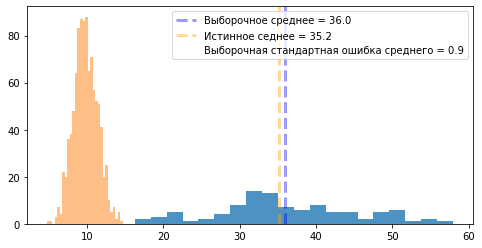

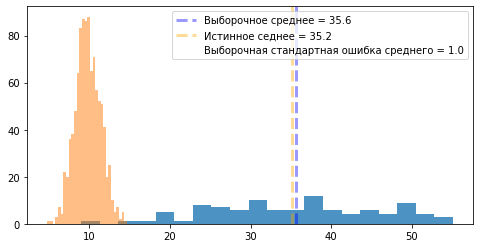

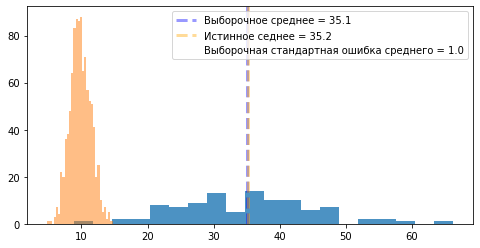

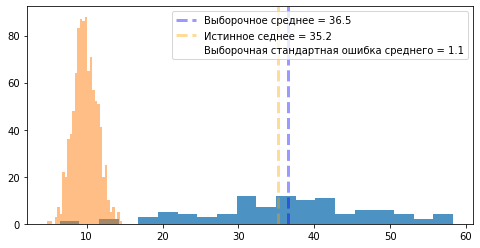

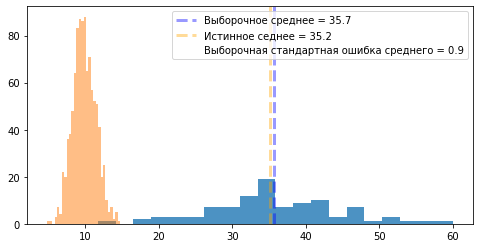

In [23]:
n = 100
for i in range(5):
    sample = np.random.choice(gen_pop, n, replace=False)
    sample_mean = np.mean(sample)
    sem = stats.sem(sample)
    
    fig = plt.figure(figsize=(8,4))
    
    ax1 = plt.subplot(111)
    plt.hist(sample, 20, alpha=0.8)
    plt.hist(std_sample_l_corrected, alpha=0.5, bins=30)

    line1 = plt.axvline(sample_mean, label = ('Выборочное среднее = '+str(round(sample_mean,1))),
                    color='blue', linestyle='dashed', linewidth=3, alpha=0.4)
    line2 = plt.axvline(mean, label = ('Истинное седнее = '+str(round(mean,1))),
                    color='orange', linestyle='dashed', linewidth=3, alpha=0.4)
    line3 = plt.axvline(mean, label = ('Выборочная стандартная ошибка среднего = '+str(round(sem,1))),
                    color='black', linestyle='dashed', linewidth=3, alpha=0.0)
    ax1.legend(handles=[line1, line2,line3], fontsize=10)
    
    plt.legend()
    plt.show()

### Свойства статистических оценок
 - несмещенность
 - состоятельность
 - эффективность

#### 1 Несмещённость

In [24]:
iterations = 5000
n = 20

std_sample_l = []
std_sample_l_corrected = []

est = []
est_ = []

for i in range(iterations):
    sample = np.random.choice(gen_pop, n, replace=False)
    std_sample = np.std(sample)
    std_sample_corrected = np.std(sample, ddof = 1)
    
    std_sample_l.append(std_sample)
    std_sample_l_corrected.append(std_sample_corrected)
    
    if i%20 == 0:
        est.append(np.abs(np.mean(std_sample_l) - std_))
        est_.append(np.abs(np.mean(std_sample_corrected) - std_))

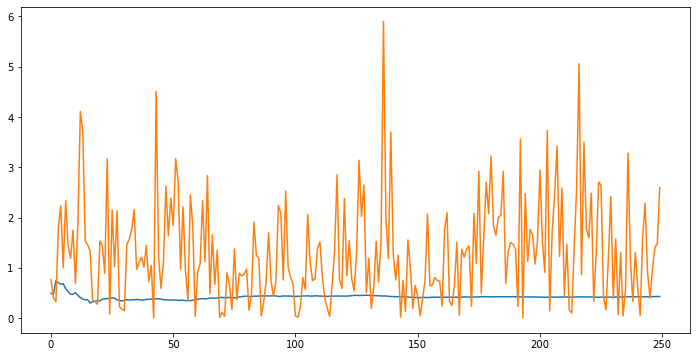

In [25]:
fig = plt.figure(figsize=(12,6))
plt.plot(est)
plt.plot(est_)
plt.show()

#### 2 Состоятельность

In [27]:
est = []
for i in range(10,5000,10):
    sample = np.random.choice(gen_pop, n, replace=False)
    est.append(sample)

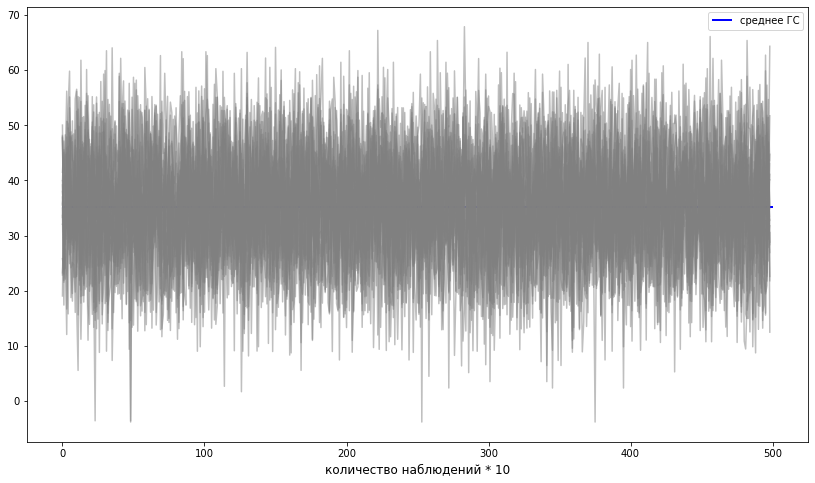

In [28]:
plt.figure(figsize = (14,8))
plt.plot(est, c='grey', alpha=0.5)
plt.hlines(mean, 0, 500, color='blue', lw=2, label='среднее ГС')
plt.xlabel('количество наблюдений * 10', size=12)
plt.legend()
plt.show()

#### 3 Эффективность

### Задание

In [29]:
# 1 номер

import statistics

math_grades = [85,90,78,92,88,85,76,98,94,87]
statistics.median(math_grades)

87.5

In [33]:
# 2 задание

res_std = np.std(math_grades)
round(res_std,3)

6.435

In [34]:
# 3 задание

from statistics import mean 

list_avg = mean(math_grades) 
print("Average value of the list:\n") 
print(list_avg)


Average value of the list:

87.3
